<a href="https://colab.research.google.com/github/maanasvi999/RandomForestClassifier/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classifier**

**What is a Random Forest Classifier?**



> Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of “combining multiple classifiers to solve a complex problem and to improve the performance of the model”.


Thus, a random forest is nothing but a collection of **Decision trees**. They are capable of fitting complex data sets while allowing the user to see how a decision was taken. 


> A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.


The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then it collects the votes from different decision trees to decide the final prediction.

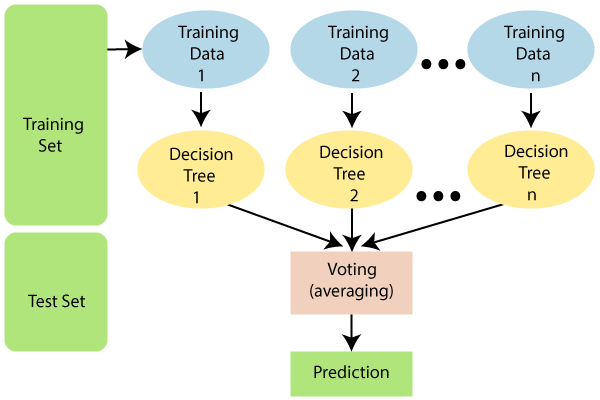

Now let's look at a practical implementation:

**Random Forest Classifier for Smart Crops Recommendation System**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv('dataset.csv')
df_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,57,44,20.879744,82.002744,6.502985,202.935536,rice
1,74,57,44,21.770462,80.319644,7.038096,226.655537,rice
2,92,41,38,23.004459,82.320763,7.840207,263.964248,rice
3,68,44,38,26.491096,80.158363,6.980401,242.864034,rice
4,66,36,40,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#To get info about the data set
df_data.info()
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2000 non-null   int64  
 1   P            2000 non-null   int64  
 2   K            2000 non-null   int64  
 3   temperature  2000 non-null   float64
 4   humidity     2000 non-null   float64
 5   ph           2000 non-null   float64
 6   rainfall     2000 non-null   float64
 7   label        2000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 125.1+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.859500,52.844000,51.002000,25.364491,71.951877,6.490521,103.916963
std,37.647462,33.992991,52.299882,5.083414,22.392495,0.770847,54.850112
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,26.000000,22.000000,22.602437,61.251404,5.980442,66.450605
50%,39.000000,49.000000,35.000000,25.323563,80.544357,6.422961,95.246217
75%,87.000000,67.000000,50.000000,28.085168,90.467104,6.929842,120.997164
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
X = df_data[['N', 'P', 'K','humidity','temperature','ph','rainfall']]
y = df_data['label']

In [5]:
#Import from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [6]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Add details about n_estimator and other fields inside 

In [7]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [8]:
#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9966666666666667


Now we can use this Random Forest Classifier model developed to create an API to connect it to a form to get the Best Crop Recommended for given input values of NPK values, Temperature and Humidity settings, pH and Rainfall levels.

The Form and Output would look something like this!

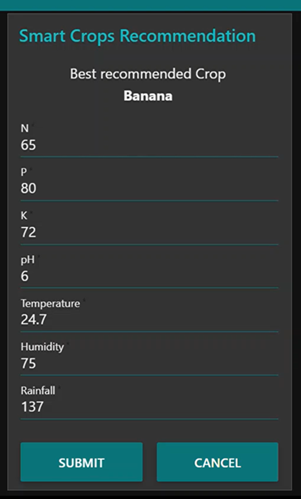

In [10]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = clf.predict(data)
print(prediction)

['coffee']


> Sure Decision Tree Classifier can be used, but if you remember the definition of Random Forest Classifer, it shows which algorithm gives a better accuracy!


Let's practically look at the difference in the accuracies

In [11]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)
y_pred = dfc.predict(X_test)

In [12]:
# Model Accuracy
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99


> As it can be seen practically, Random Forest has better classification as compared to Decision Trees.

P.S. There are various other Classification Algorithms available, but I have chosen to use and compare these two.




